# CNN: Fashion-MNIST 

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:


| Label |	Description|
|---|------------------|
| 0 |	T-shirt/top    |
| 1 |	Trouser        |
| 2 |	Pullover       |
| 3 |	Dress          |
| 4 |	Coat           |
| 5 |	Sandal         |
| 6 |	Shirt          |
| 7 |	Sneaker        |
| 8 |	Bag            |
| 9 |	Ankle boot     |

See [keras docs](https://keras.io/datasets/).

In this exercise we will train a CNN on the dataset.
You can use either TensorFlow or Keras.

We'll get the data via [`keras.datasets`](https://keras.io/datasets/).
It takes some time to download.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
try:
    import keras
except ModuleNotFoundError:
    from tensorflow import keras
print('GPU:', tf.test.is_gpu_available())

GPU: True


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

We need to convert the images to a float32 between 0 and 1 and reshape to 28x28x1 (only one channel for black and white) because 2D convolutions expect 3D images (3rd dimension is channel or image).

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Let's see the images.

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


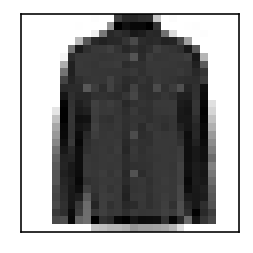

In [4]:
i = np.random.randint(0, x_train.shape[0])
plt.figure(figsize=(2,2))
plt.imshow(x_train[i, :, :, 0], cmap='gray_r')
plt.xticks([]); plt.yticks([])
print(y_train[i])

Now build and train the CNN.
When I trained a CNN I got this accuracy of ~87% on the test set, see if you can top it.

We also need to one-hot encode the labels.

In [5]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(32, (3, 3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_classes))
model.add(keras.layers.Activation('softmax'))

In [7]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=50,
    epochs=10,
    validation_data=(x_test, y_test)
).history

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.9226 - accuracy: 0.6696 - val_loss: 0.5855 - val_accuracy: 0.7789
Epoch 2/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.5837 - accuracy: 0.7840 - val_loss: 0.5088 - val_accuracy: 0.8150
Epoch 3/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.5150 - accuracy: 0.8107 - val_loss: 0.4531 - val_accuracy: 0.8389
Epoch 4/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4682 - accuracy: 0.8308 - val_loss: 0.4225 - val_accuracy: 0.8496
Epoch 5/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4386 - accuracy: 0.8421 - val_loss: 0.4036 - val_accuracy: 0.8558
Epoch 6/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4172 - accuracy: 0.8500 - val_loss: 0.3824 - val_accuracy: 0.8636
Epoch 7/10
60000/60000 [==============================]

In [11]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.33782794494628904
Test accuracy: 0.8779


In [12]:
model.save('../data/keras_cnn_fashion_model.h5')